# Anime Dataset


### Importuri

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests
import time

## Incarcare si afisare


In [2]:
db=pd.read_csv("top_anime_dataset.csv")
db

,anime_id,anime_url,image_url,name,english_name,japanese_names,score,genres,synopsis,type,...,producers,studios,source,duration,rating,rank,popularity,favorites,scored_by,members
0,52991,https://myanimelist.net/anime/52991/Sousou_no_...,https://cdn.myanimelist.net/images/anime/1015/...,Sousou no Frieren,Frieren: Beyond Journey's End,葬送のフリーレン,9.31,"Adventure, Drama, Fantasy",During their decade-long quest to defeat the D...,TV,...,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,1.0,160,63200,603520,1035677
1,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/images/anime/1208/...,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,231928,2196353,3483268
2,9253,https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/images/anime/1935/...,Steins;Gate,Steins;Gate,STEINS;GATE,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,...,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,3.0,14,194507,1449844,2667979
3,60022,https://myanimelist.net/anime/60022/One_Piece_...,https://cdn.myanimelist.net/images/anime/1455/...,One Piece Fan Letter,NaN,ONE PIECE FAN LETTER,9.06,"Action, Adventure, Fantasy",Although the golden age of piracy is about to ...,TV Special,...,NaN,Toei Animation,Light novel,24 min,PG-13 - Teens 13 or older,4.0,2350,1970,68977,91278
4,38524,https://myanimelist.net/anime/38524/Shingeki_n...,https://cdn.myanimelist.net/images/anime/1517/...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,9.05,"Action, Drama, Suspense",Seeking to restore humanity's diminishing hope...,TV,...,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23 min per ep,R - 17+ (violence & profanity),5.0,21,60500,1671010,2407861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,1595,https://myanimelist.net/anime/1595/Inma_Daitos...,https://cdn.myanimelist.net/images/anime/11/13...,Inma Daitoshi: Beast City,Beast City,淫魔大都市 BEAST CITY,5.57,Hentai,The modern age. Albeit tales of strange things...,OVA,...,"Comstock, Ltd.",C and R,Light novel,41 min per ep,Rx - Hentai,NaN,10513,9,883,3021
14996,49943,https://myanimelist.net/anime/49943/Cosplay_Ch...,https://cdn.myanimelist.net/images/anime/1384/...,Cosplay Change: Pure-kei Joshidaisei no Kiken ...,NaN,コスプレチェンジ ~ピュア系女子大生の危険な性癖~,5.57,Hentai,Aima Imoko is a young college student with a h...,OVA,...,NaN,Mousou Senka,Manga,20 min per ep,Rx - Hentai,NaN,9348,8,1675,4343
14997,38812,https://myanimelist.net/anime/38812/Botsuraku,https://cdn.myanimelist.net/images/anime/1301/...,Botsuraku,NaN,没落,5.57,NaN,A short music video of the song Botsuraku by t...,Music,...,Victor Entertainment,NaN,Original,1 min,G - All Ages,NaN,18697,0,196,364
14998,38914,https://myanimelist.net/anime/38914/Papa_no_March,https://cdn.myanimelist.net/images/anime/1553/...,Papa no March,Papa's March,パパのマーチ,5.57,NaN,Official music video directed by Mitsuyuki Ish...,Music,...,NaN,NaN,Original,3 min,G - All Ages,NaN,20187,0,132,273


### Eliminare coloane si randuri

Eliminarea coloanelor:
- anime_url: link-ul catre pagina anime ului
- image_url: link-ul catre imagine
- english_name: denumirea in limba engleza
- japanese_names: denumirea in limba japoneza
- synopsis: descrierea anime ului
- premiered: cand a aparut anime ul, eliminata deoarece peste 60% din valori sunt lipsa
- rank: are o corelatie de 0.98 cu score si contine 1800 de valori NaN, din aceasta cauza am decis eliminarea ei
- scored_by: are o corelatie de 0.99 cu 'members'

In [3]:
df = db.drop(['anime_url','image_url','english_name','japanese_names','synopsis','premiered','rank','scored_by'], axis=1)
df = df[df['rating'] != 'Rx - Hentai']

### Coloana 'duration'
- extragerea duratiei unui episod din string, convertirea acestuia la float si pe urma la int
- inlocuirea valorilor NaN cu media valorilor din coloana

In [4]:
df['duration'] = df['duration'].str.extract(r'(\d+)').astype(float)
df['duration'] = df['duration'].fillna(df['duration'].mean()).astype(int)

### Coloana 'episodes'
- completare valori NaN cu media si conversia la int

In [5]:
df['episodes'] = df['episodes'].fillna(df['episodes'].mean()).astype(int)

### Coloana 'rating'
- maparea rating urilor si acordarea unui numar care semnifica varsta minima necesara pentru vizionarea animeului respectiv
- inlocuirea valorilor NaN din coloana rating cu 'Unkonown' si maparea acestuia cu -1

In [6]:
rating_mapping = {
    'G - All Ages': 0,
    'PG - Children': 8,
    'PG-13 - Teens 13 or older': 13,
    'R - 17+ (violence & profanity)': 17,
    'R+ - Mild Nudity': 18
}
df['rating'] = df['rating'].fillna('Unknown')
rating_mapping['Unknown'] = -1
df['rating'] = df['rating'].map(rating_mapping)


### Coloana 'source'

In [7]:
## Frecevența valorilor din 'source'
# freq_encoding = df['source'].value_counts(normalize=True)

# # Mapăm fiecare valoare din 'source' la frecvența ei
# df['source_freq'] = df['source'].map(freq_encoding)

# # Dacă vrei să elimini coloana originală, o poți face:
# df.drop(columns=['source'], inplace=True)

## One-hot encoding
# df_encoded = pd.get_dummies(df, columns=['source'], prefix='source')
# df_encoded

df["source"] = df["source"].astype('category')
df["source"] = df["source"].cat.codes

In [8]:
df["source"].unique()

array([ 5, 14,  4,  8,  9, 15,  7,  0, 16,  3, 10,  1,  6, 11, 13,  2, 12],
      dtype=int8)

### Coloana 'type'


In [9]:
df['type'] = df['type'].fillna('TV')
# Convertirea coloanei 'type' la valori numerice folosind factorize()
df['type'] = pd.factorize(df['type'])[0]

### Coloana 'genres'

In [10]:
# Împarte valorile din coloana 'genres' în liste de genuri
df['genres'] = df['genres'].str.split(', ')

# Creează coloane binare pentru fiecare gen folosind get_dummies
genres_dummies = df['genres'].str.join('|').str.get_dummies()

# Concatenează DataFrame-ul original cu DataFrame-ul genurilor codificate
df = pd.concat([df, genres_dummies], axis=1)

# Elimină coloana originală 'genres'
df.drop(columns=['genres'], inplace=True)

# Elimină coloana
df = df.drop(['Hentai'], axis=1)

### Coloana 'producers'

In [11]:
# Înlocuiește valorile NaN din coloana 'producers' cu 'Unknown'
df['producers'] = df['producers'].fillna('Unknown')

### Coloana 'studios'

In [12]:
# Înlocuiește valorile NaN din coloana 'studios' cu 'Unknown'
df['studios'] = df['studios'].fillna('Unknown')

### Stergere duplicate

In [13]:
df.duplicated().sum()  # 32 duplicate
df = df.drop_duplicates()

In [14]:
df

,anime_id,name,score,type,episodes,producers,studios,source,duration,rating,...,Girls Love,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,52991,Sousou no Frieren,9.31,0,28,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",Madhouse,5,24,13,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,9.10,0,64,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,5,24,17,...,0,0,0,0,0,0,0,0,0,0
2,9253,Steins;Gate,9.07,0,24,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,14,24,13,...,0,0,0,0,0,1,0,0,0,1
3,60022,One Piece Fan Letter,9.06,1,1,Unknown,Toei Animation,4,24,13,...,0,0,0,0,0,0,0,0,0,0
4,38524,Shingeki no Kyojin Season 3 Part 2,9.05,0,10,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,5,23,17,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,36087,Nerenai!!!,5.57,4,1,Unknown,Unknown,7,5,8,...,0,0,0,0,0,0,0,0,0,0
14994,36095,Mirror Mirror (Bombs BiS),5.57,4,1,Virgin Babylon Records,Onionskin,9,5,13,...,0,0,0,0,0,0,0,0,0,0
14997,38812,Botsuraku,5.57,4,1,Victor Entertainment,Unknown,9,1,0,...,0,0,0,0,0,0,0,0,0,0
14998,38914,Papa no March,5.57,4,1,Unknown,Unknown,9,3,0,...,0,0,0,0,0,0,0,0,0,0


## Histograma

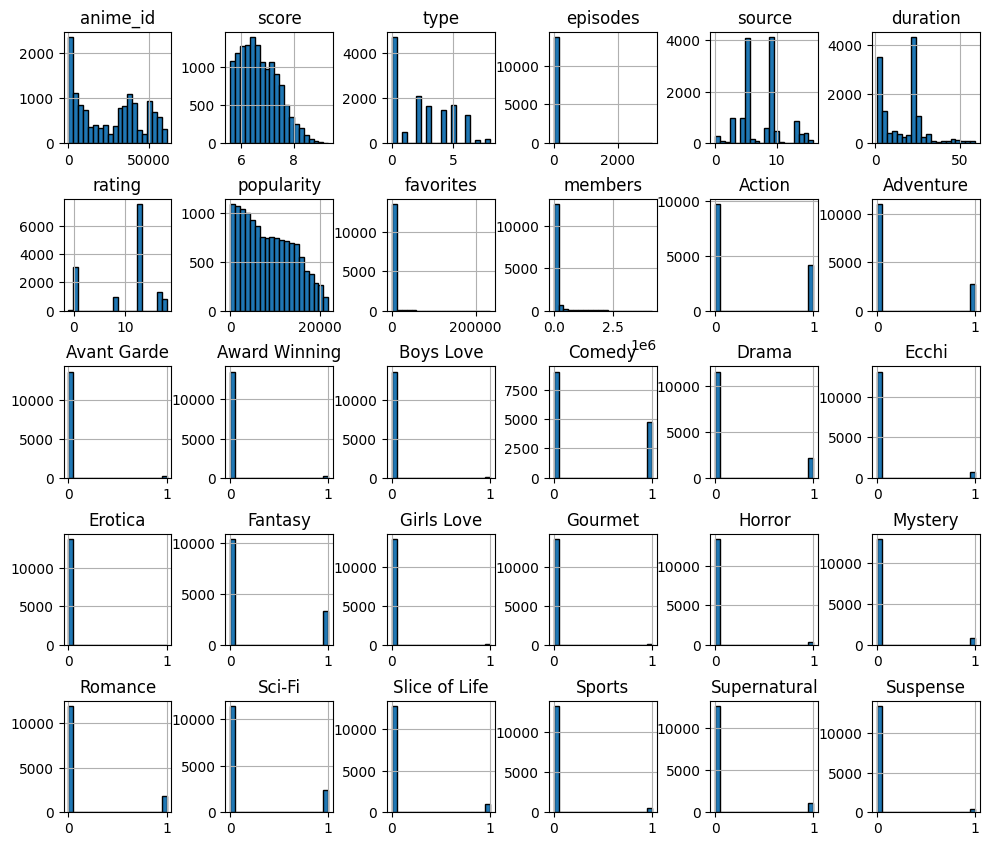

In [15]:
df.hist(figsize=(10,10), bins=20, layout=(6,6), edgecolor='black')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

## Describe

In [16]:
df.describe()

,anime_id,score,type,episodes,source,duration,rating,popularity,favorites,members,...,Girls Love,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
count,13760.000000,13760.000000,13760.000000,13760.000000,13760.000000,13760.000000,13760.000000,13760.000000,13760.000000,1.376000e+04,...,13760.000000,13760.00000,13760.000000,13760.000000,13760.000000,13760.000000,13760.000000,13760.000000,13760.000000,13760.000000
mean,25928.328997,6.697041,2.494695,13.530887,7.309884,16.615116,10.336555,8510.138081,871.306468,7.573820e+04,...,0.006177,0.00923,0.025436,0.058939,0.131323,0.173619,0.071003,0.040552,0.081541,0.026235
std,19287.980511,0.714481,2.255914,52.224272,3.459385,12.868265,6.068284,5674.029500,6368.066533,2.293387e+05,...,0.078356,0.09563,0.157451,0.235519,0.337765,0.378795,0.256839,0.197258,0.273674,0.159841
min,1.000000,5.570000,0.000000,1.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,1.800000e+02,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6066.250000,6.120000,0.000000,1.000000,5.000000,3.000000,8.000000,3539.750000,1.000000,1.397000e+03,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28622.000000,6.600000,2.000000,3.000000,8.000000,22.000000,13.000000,7859.500000,10.000000,6.854500e+03,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,40928.500000,7.210000,4.000000,13.000000,9.000000,24.000000,13.000000,13013.500000,107.000000,4.468150e+04,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,60988.000000,9.310000,8.000000,3057.000000,16.000000,59.000000,18.000000,21856.000000,234344.000000,4.116124e+06,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Nul

In [17]:
df.isnull().sum()

anime_id         0
name             0
score            0
type             0
episodes         0
producers        0
studios          0
source           0
duration         0
rating           0
popularity       0
favorites        0
members          0
Action           0
Adventure        0
Avant Garde      0
Award Winning    0
Boys Love        0
Comedy           0
Drama            0
Ecchi            0
Erotica          0
Fantasy          0
Girls Love       0
Gourmet          0
Horror           0
Mystery          0
Romance          0
Sci-Fi           0
Slice of Life    0
Sports           0
Supernatural     0
Suspense         0
dtype: int64

In [18]:
df.dtypes

anime_id           int64
name              object
score            float64
type               int64
episodes           int64
producers         object
studios           object
source              int8
duration           int64
rating             int64
popularity         int64
favorites          int64
members            int64
Action             int64
Adventure          int64
Avant Garde        int64
Award Winning      int64
Boys Love          int64
Comedy             int64
Drama              int64
Ecchi              int64
Erotica            int64
Fantasy            int64
Girls Love         int64
Gourmet            int64
Horror             int64
Mystery            int64
Romance            int64
Sci-Fi             int64
Slice of Life      int64
Sports             int64
Supernatural       int64
Suspense           int64
dtype: object

In [19]:
# Selectează doar coloanele numerice
numeric_df = df.select_dtypes(include=['number'])

# Calculează corelația între coloanele numerice
correlation_matrix = numeric_df.corr()

# Afișează matricea de corelație
correlation_matrix

,anime_id,score,type,episodes,source,duration,rating,popularity,favorites,members,...,Girls Love,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
anime_id,1.000000,-0.067645,0.278707,-0.078240,0.039091,-0.258655,-0.036707,0.271111,-0.032831,-0.022331,...,-0.008055,0.032707,-0.059784,-0.040920,-0.118352,-0.212423,0.024150,-0.037628,-0.030496,0.010218
score,-0.067645,1.000000,-0.258938,0.040339,-0.174910,0.136299,0.323240,-0.669926,0.276657,0.431802,...,0.016697,0.007218,-0.010637,0.145948,0.129971,0.025243,-0.015220,0.053189,0.093545,0.121546
type,0.278707,-0.258938,1.000000,-0.170232,0.086962,-0.272313,-0.114199,0.405756,-0.131980,-0.264309,...,-0.014411,0.012187,-0.035633,-0.073075,-0.098905,-0.083081,0.016894,-0.057007,-0.025904,-0.063408
episodes,-0.078240,0.040339,-0.170232,1.000000,0.023737,0.039386,-0.048347,-0.026781,0.056594,0.042950,...,-0.008545,0.030700,-0.010693,-0.016306,-0.008827,-0.001551,0.005252,0.012662,-0.005221,-0.011229
source,0.039091,-0.174910,0.086962,0.023737,1.000000,-0.053574,-0.162909,0.273597,-0.040088,-0.110389,...,-0.025295,-0.023805,0.014617,-0.021170,-0.008706,0.049124,-0.043498,-0.069434,-0.033524,0.001463
duration,-0.258655,0.136299,-0.272313,0.039386,-0.053574,1.000000,0.209698,-0.280179,0.057314,0.116934,...,0.016630,0.004718,0.060827,0.056814,0.096375,0.119335,-0.036085,0.046807,0.048475,0.029361
rating,-0.036707,0.323240,-0.114199,-0.048347,-0.162909,0.209698,1.000000,-0.498736,0.091896,0.204115,...,0.041178,-0.032531,0.122029,0.144122,0.139563,0.146361,-0.146370,0.004748,0.126757,0.150274
popularity,0.271111,-0.669926,0.405756,-0.026781,0.273597,-0.280179,-0.498736,1.000000,-0.193875,-0.426535,...,-0.049300,-0.002211,-0.054833,-0.135609,-0.223651,-0.105089,0.039543,-0.036593,-0.129272,-0.131822
favorites,-0.032831,0.276657,-0.131980,0.056594,-0.040088,0.057314,0.091896,-0.193875,1.000000,0.771050,...,-0.004178,-0.005723,0.012121,0.028104,0.027924,-0.003851,-0.025031,-0.005753,0.038549,0.130368
members,-0.022331,0.431802,-0.264309,0.042950,-0.110389,0.116934,0.204115,-0.426535,0.771050,1.000000,...,0.000205,0.007089,0.037572,0.062348,0.111250,-0.020509,-0.048797,-0.010597,0.083607,0.183646


### Heatmap

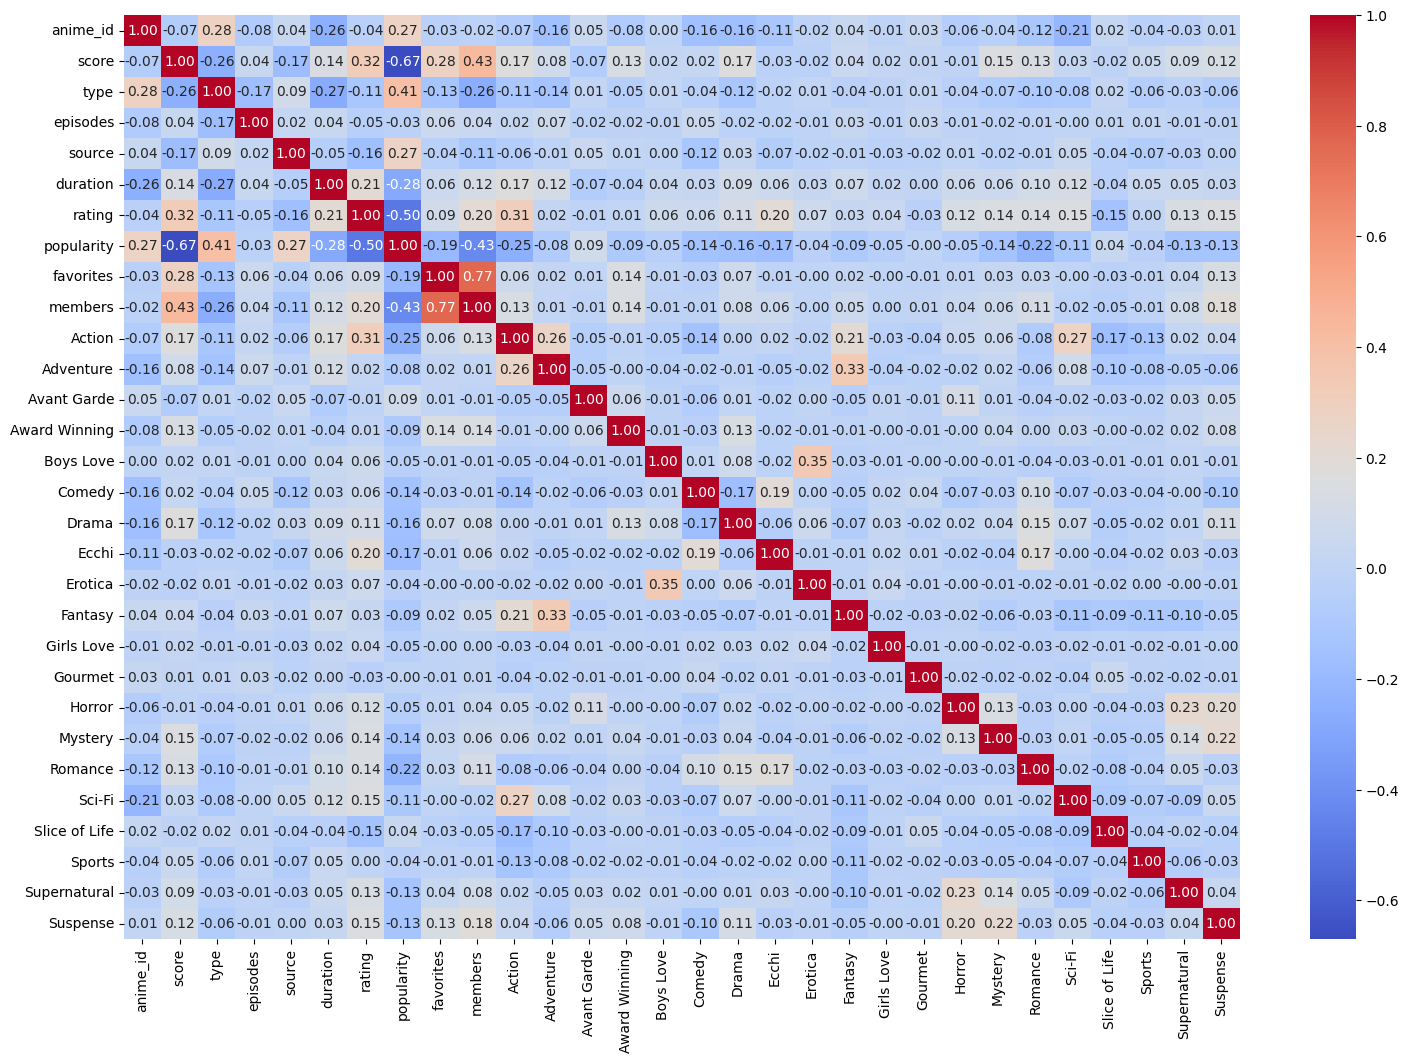

In [20]:
plt.figure(figsize=(18, 12)) 
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()